In [29]:
import numpy as np
import matplotlib.pyplot as plt
import struct

# Load MNIST-files into numpy arrays
# http://yann.lecun.com/exdb/mnist/
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

## 1. Load the data

In [30]:
X_train = read_idx('train-images.idx3-ubyte')
y_train = read_idx('train-labels.idx1-ubyte')

# Scale the grayscale values [0, 255] into [0, 1]
X_train = X_train.astype('float32')
X_train /= 255
X_train = X_train.reshape(60000, 784)

# Convert the target values into a "one hot" array,
# for axample: 4 -> [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
Y_train = np.zeros((60000, 10))
for k in range(0, 60000):
    Y_train[k, y_train[k]] = 1

## 2. Train the network using backpropagation

Epoch 0 :    J =  0.294835561268
Epoch 1 :    J =  0.155620280607
Epoch 2 :    J =  0.125157483242
Epoch 3 :    J =  0.111525859337
Epoch 4 :    J =  0.10262396422
Epoch 5 :    J =  0.0961190573205
Epoch 6 :    J =  0.088557331642
Epoch 7 :    J =  0.0813891375978
Epoch 8 :    J =  0.0770152702229
Epoch 9 :    J =  0.0738639108056
Epoch 10 :    J =  0.0722636298286
Epoch 11 :    J =  0.0712683807599
Epoch 12 :    J =  0.0699970838224
Epoch 13 :    J =  0.0681964248207
Epoch 14 :    J =  0.0660320336738
Epoch 15 :    J =  0.0637189737249
Epoch 16 :    J =  0.0617592850183
Epoch 17 :    J =  0.060297505282
Epoch 18 :    J =  0.0592338811471
Epoch 19 :    J =  0.0584356114602
Epoch 20 :    J =  0.0578203006695
Epoch 21 :    J =  0.0572430396982
Epoch 22 :    J =  0.0565637939037
Epoch 23 :    J =  0.0557066694445
Epoch 24 :    J =  0.0546560275835
Epoch 25 :    J =  0.0534595519596
Epoch 26 :    J =  0.0521969104581
Epoch 27 :    J =  0.0509447756022
Epoch 28 :    J =  0.0497425076827
Epo

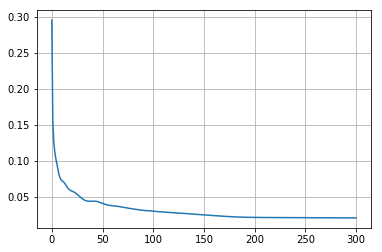

In [31]:
# Initialize the coefficients with random values between [-1, 1]
W1 = 2*np.random.random((16, 785)) - 1
W2 = 2*np.random.random((16, 17)) - 1
W3 = 2*np.random.random((10, 17))- 1

alpha = 0.5
N = 60000 # Number of training images
epochs = 300
J = np.zeros(epochs+1)  # Square errors, only for printing


for epoch in range(0, epochs+1):
    for m in range(0, N, 100): # Batch size 100
        
        error = 0
        D1 = 0
        D2 = 0
        D3 = 0
    
        for k in range(0, 100):
            n = m + k
            A1 = np.append(1, X_train[n, :]).reshape((785, 1))
            Y = Y_train[n, :].reshape((10, 1))
            
            # Feed forward
            A2 = np.append(1, sigmoid(np.dot(W1, A1))).reshape((17, 1))
            A3 = np.append(1, sigmoid(np.dot(W2, A2))).reshape((17, 1))
            A4 = sigmoid(np.dot(W3, A3))
        
            error = error + np.dot((A4 - Y).transpose(), (A4 - Y))
            
            # Backpropagation
            d4 = A4 - Y
            d3 = A3 * (1 - A3) * np.dot(W3.transpose(), d4)
            d3 = d3[1:]  # Remove the error of the constant a_0 = 1
            d2 = A2 * (1 - A2) * np.dot(W2.transpose(), d3)
            d2 = d2[1:]  # Remove the error of the constant a_0 = 1
        
            D3 = D3 + np.dot(d4, A3.transpose())
            D2 = D2 + np.dot(d3, A2.transpose())
            D1 = D1 + np.dot(d2, A1.transpose())
        
        W1 = W1 - alpha*D1/100
        W2 = W2 - alpha*D2/100
        W3 = W3 - alpha*D3/100
    
    J[epoch] = error/100
    print('Epoch', epoch, ':    J = ', J[epoch])
    
plt.figure()
plt.plot(J)
plt.grid()
plt.show()

## Save the trained coefficients

In [32]:
np.save('W1', W1)
np.save('W2', W2)
np.save('W3', W3)